#### Import libraries

In [1]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from scipy.stats import norm
import yfinance as yf
from scipy.stats import f_oneway
from scipy.stats import ks_2samp

#### Fetch the SP500 ticker list from Wikipedia

In [2]:
tickers=[]
resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
soup = bs.BeautifulSoup(resp.text)
table = soup.find("table", {"class":"wikitable sortable"}) 
for row in table.findAll("tr")[1:]:
    ticker = row.findAll("td")[0].text[:-1] 
    tickers.append(ticker)

### Change some ticker names as reported differently in wikipedia than yahoo
modified_tickers=[]
for x in tickers:
    x=x.replace('.', '-')
    modified_tickers.append(x)

modified_tickers.append("^GSPC")

#### Created the df with Moments 

In [ ]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2022,1,18)
means=[]
variances=[]
skewness=[]
kurtosis=[]
corr=[]

sep=web.DataReader('^GSPC', "yahoo", start, end)
sep['log_ret'] = np.log(sep['Adj Close']) - np.log(sep['Adj Close'].shift(1))
sep['log_ret']=sep['log_ret'].fillna(0)

for i in modified_tickers:
    df = web.DataReader(i, "yahoo", start, end)
    df['log_ret'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
    df['log_ret']=df['log_ret'].fillna(0)
    correl = df['log_ret'].corr(sep['log_ret'])

    corr.append(correl)
    means.append(df['log_ret'].mean())
    variances.append(df['log_ret'].var())
    skewness.append(df['log_ret'].skew())
    kurtosis.append(df['log_ret'].kurt())

In [10]:
complete_df=pd.DataFrame(list(zip(modified_tickers, means, variances, skewness, kurtosis, corr)), columns = ['Ticker', 'Mean', 'Variance', 'Skewness', 'Kurtosis', 'Correlation'])
complete_df.head()

,Ticker,Mean,Variance,Skewness,Kurtosis,Correlation
0,MMM,0.000360,0.000182,-0.784178,10.704255,0.721012
1,AOS,0.000843,0.000292,0.027378,3.321731,0.643901
2,ABT,0.000612,0.000181,-0.422596,8.518813,0.650902
3,ABBV,0.000764,0.000306,-0.872868,11.795357,0.527220
4,ABMD,0.001158,0.000849,-1.538844,28.424259,0.390742


#### Plotted the 5 Moments with the Normal distribution associated

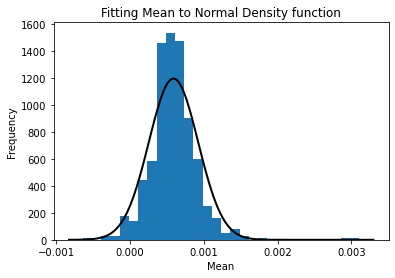

                  Mean
Moment                
Mean      5.906112e-04
Variance  1.115075e-07
Skewness  1.577003e+00
Kurtosis  1.131914e+01


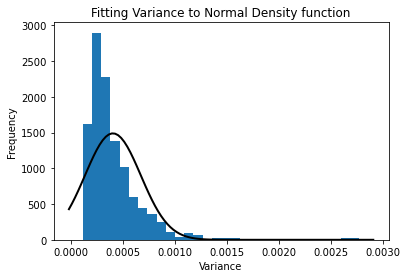

              Variance
Moment                
Mean      4.018667e-04
Variance  7.193871e-08
Skewness  3.507098e+00
Kurtosis  2.239718e+01


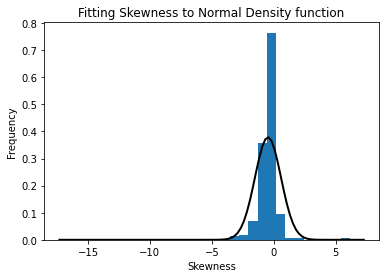

            Skewness
Moment              
Mean       -0.472203
Variance    1.110634
Skewness   -5.987077
Kurtosis  103.795315


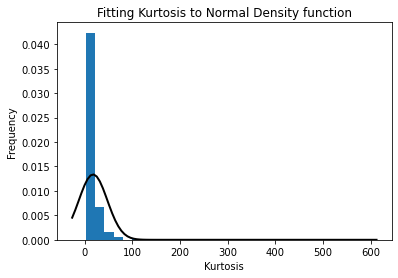

            Kurtosis
Moment              
Mean       17.332097
Variance  890.335936
Skewness   14.316463
Kurtosis  259.349880


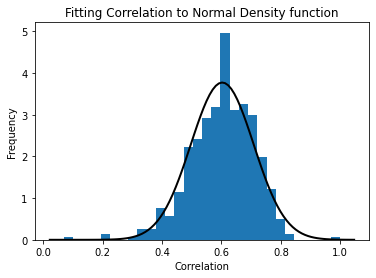

          Correlation
Moment               
Mean         0.602672
Variance     0.011207
Skewness    -0.584802
Kurtosis     1.557951


In [4]:
Moments = ['Mean', 'Variance', 'Skewness', 'Kurtosis', 'Correlation']
for i in Moments:
    data = complete_df[i]

    # Fit a normal distribution to
    # the data:
    # mean and standard deviation
    mu, std = norm.fit(data) 

    # Plot the histogram.
    plt.hist(data, bins=30, density=True)

    # Plot the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = 'Fitting ' + i + ' to Normal Density function'
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(i) 
    plt.show()
    
    
    trial = [['Mean', complete_df[i].mean()], ['Variance', complete_df[i].var()], ['Skewness', complete_df[i].skew()], ['Kurtosis', complete_df[i].kurt()]]
 
    # Create the pandas DataFrame
    df = pd.DataFrame(trial, columns = ['Moment', i])
    df.set_index('Moment', inplace=True)
    
    print(df)

#### Scatterplot visualization for all possible Moment pairs

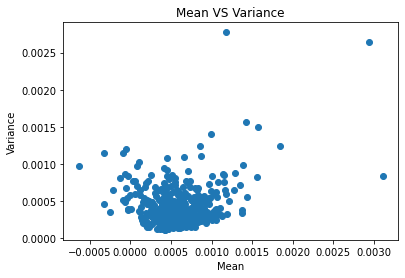

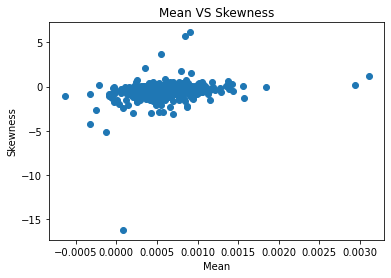

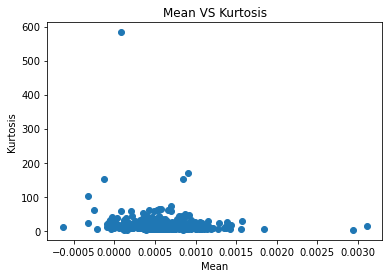

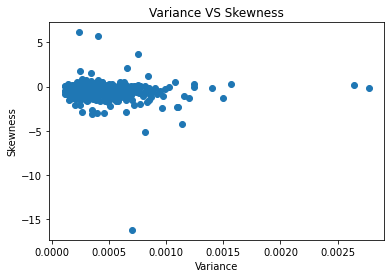

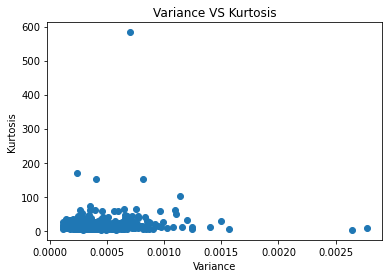

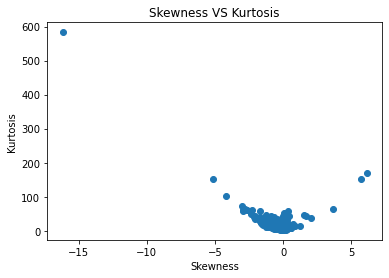

In [6]:
for i in range(1,5):
    for k in range(i+1,5):
        plt.scatter(complete_df.iloc[:,i], complete_df.iloc[:,k])
        title = str(complete_df.iloc[:,i].name) + ' VS ' + str(complete_df.iloc[:,k].name)
        plt.title(title)
        plt.ylabel(complete_df.iloc[:,k].name)
        plt.xlabel(complete_df.iloc[:,i].name)
        plt.show()

#### Repeated the analysis for the period before the Covid-19 Pandemic

In [ ]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2019,12,31)
pre_means=[]
pre_variances=[]
pre_skewness=[]
pre_kurtosis=[]
pre_corr=[]

sep=web.DataReader('^GSPC', "yahoo", start, end)
sep['log_ret'] = np.log(sep['Adj Close']) - np.log(sep['Adj Close'].shift(1))
sep['log_ret']=sep['log_ret'].fillna(0)


for i in modified_tickers:
    try:
        df = web.DataReader(i, "yahoo", start, end)
        df['log_ret'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
        df['log_ret']=df['log_ret'].fillna(0)
        correl = df['log_ret'].corr(sep['log_ret'])

        pre_corr.append(correl)
        pre_means.append(df['log_ret'].mean())
        pre_variances.append(df['log_ret'].var())
        pre_skewness.append(df['log_ret'].skew())
        pre_kurtosis.append(df['log_ret'].kurt())
    except:
        continue

pre_df=pd.DataFrame(list(zip(modified_tickers, pre_means, pre_variances, pre_skewness, pre_kurtosis, pre_corr)), columns = ['Ticker', 'Mean', 'Variance', 'Skewness', 'Kurtosis', 'Correlation'])
pre_df.head()

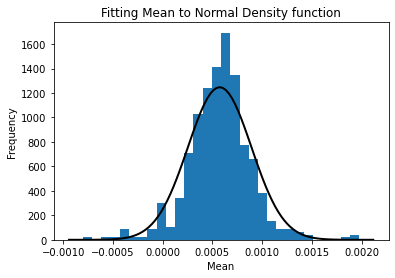

                  Mean
Moment                
Mean      5.731581e-04
Variance  1.024933e-07
Skewness  9.117773e-03
Kurtosis  2.848381e+00


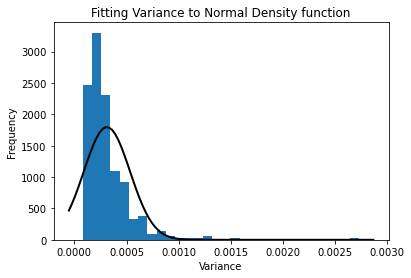

              Variance
Moment                
Mean      3.118683e-04
Variance  4.935952e-08
Skewness  4.042614e+00
Kurtosis  3.153520e+01


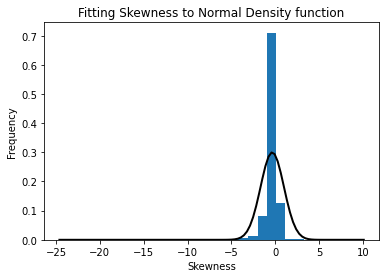

            Skewness
Moment              
Mean       -0.337242
Variance    1.770785
Skewness   -9.012926
Kurtosis  175.873680


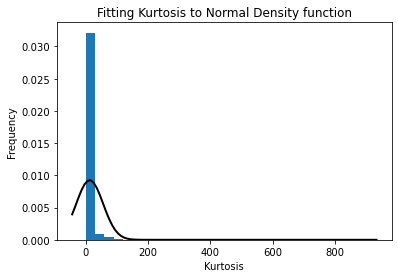

             Kurtosis
Moment               
Mean        12.019486
Variance  1857.319189
Skewness    17.440962
Kurtosis   345.800455


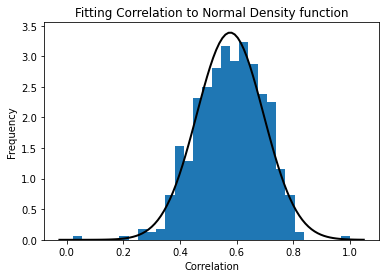

          Correlation
Moment               
Mean         0.576872
Variance     0.013895
Skewness    -0.322465
Kurtosis     0.577118


In [8]:
Moments = ['Mean', 'Variance', 'Skewness', 'Kurtosis', 'Correlation']
for i in Moments:
    data = pre_df[i]

    # Fit a normal distribution to
    # the data:
    # mean and standard deviation
    mu, std = norm.fit(data) 

    # Plot the histogram.
    plt.hist(data, bins=30, density=True)

    # Plot the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = 'Fitting ' + i + ' to Normal Density function'
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(i) 
    plt.show()
    
    trial = [['Mean', pre_df[i].mean()], ['Variance', pre_df[i].var()], ['Skewness', pre_df[i].skew()], ['Kurtosis', pre_df[i].kurt()]]
 
    # Create the pandas DataFrame
    df = pd.DataFrame(trial, columns = ['Moment', i])
    df.set_index('Moment', inplace=True)

    print(df)    

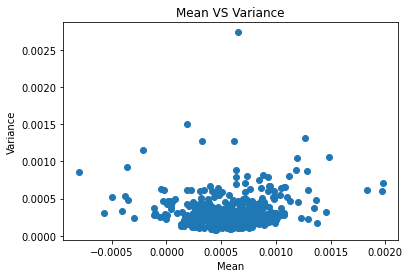

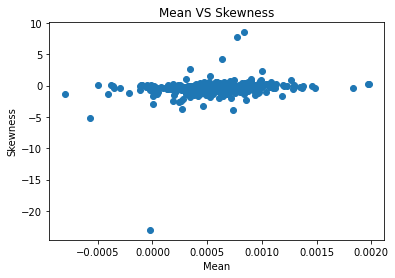

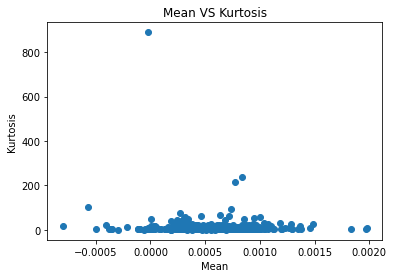

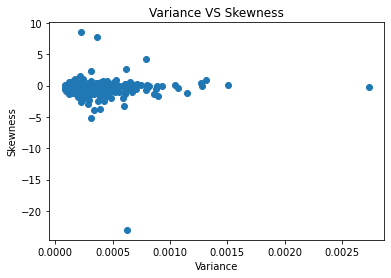

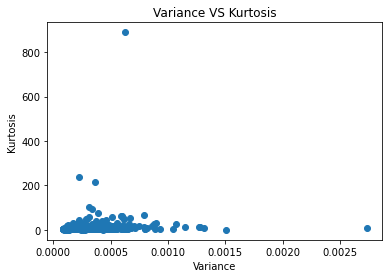

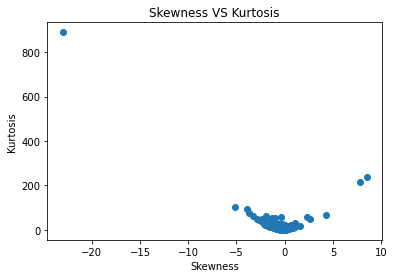

In [9]:
for i in range(1,5):
    for k in range(i+1,5):
        plt.scatter(pre_df.iloc[:,i], pre_df.iloc[:,k])
        title = str(pre_df.iloc[:,i].name) + ' VS ' + str(pre_df.iloc[:,k].name)
        plt.title(title)
        plt.ylabel(pre_df.iloc[:,k].name)
        plt.xlabel(pre_df.iloc[:,i].name)
        plt.show()

#### Repeated the analysis for the period after the Covid-19 Pandemic

In [ ]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2022,1,18)
post_means=[]
post_variances=[]
post_skewness=[]
post_kurtosis=[]
post_corr=[]

sep=web.DataReader('^GSPC', "yahoo", start, end)
sep['log_ret'] = np.log(sep['Adj Close']) - np.log(sep['Adj Close'].shift(1))
sep['log_ret']=sep['log_ret'].fillna(0)

for i in modified_tickers:
    try:
        df = web.DataReader(i, "yahoo", start, end)
        df['log_ret'] = np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1))
        df['log_ret']=df['log_ret'].fillna(0)
        correl = df['log_ret'].corr(sep['log_ret'])

        post_corr.append(correl)
        post_means.append(df['log_ret'].mean())
        post_variances.append(df['log_ret'].var())
        post_skewness.append(df['log_ret'].skew())
        post_kurtosis.append(df['log_ret'].kurt())
        print(i)
    except:
        continue
    
post_df=pd.DataFrame(list(zip(modified_tickers, post_means, post_variances, post_skewness, post_kurtosis, post_corr)), columns = ['Ticker', 'Mean', 'Variance', 'Skewness', 'Kurtosis', 'Correlation'])
post_df.head()

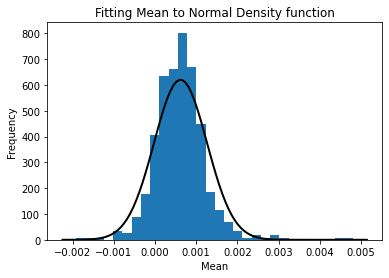

                  Mean
Moment                
Mean      6.188497e-04
Variance  4.144007e-07
Skewness  1.090546e+00
Kurtosis  6.890662e+00


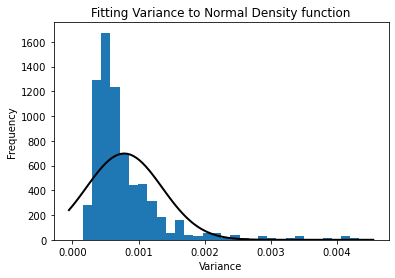

              Variance
Moment                
Mean      7.834776e-04
Variance  3.276468e-07
Skewness  2.967022e+00
Kurtosis  1.161996e+01


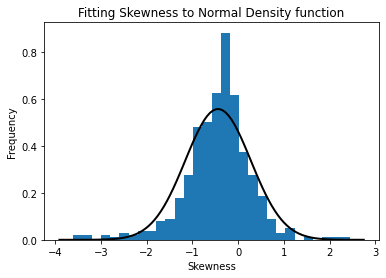

          Skewness
Moment            
Mean     -0.439681
Variance  0.514168
Skewness -0.662712
Kurtosis  3.330881


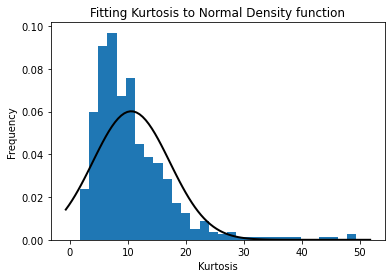

           Kurtosis
Moment             
Mean      10.597875
Variance  44.136626
Skewness   2.213460
Kurtosis   7.790795


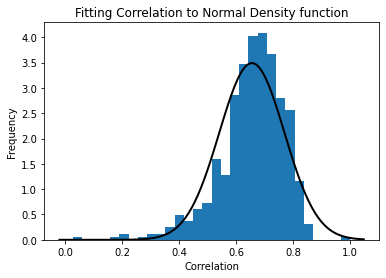

          Correlation
Moment               
Mean         0.655697
Variance     0.013085
Skewness    -1.188488
Kurtosis     3.066584


In [11]:
Moments = ['Mean', 'Variance', 'Skewness', 'Kurtosis', 'Correlation']
for i in Moments:
    data = post_df[i]

    # Fit a normal distribution to
    # the data:
    # mean and standard deviation
    mu, std = norm.fit(data) 

    # Plot the histogram.
    plt.hist(data, bins=30, density=True)

    # Plot the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    title = 'Fitting ' + i + ' to Normal Density function'
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(i) 
    plt.show()
    
    trial = [['Mean', post_df[i].mean()], ['Variance', post_df[i].var()], ['Skewness', post_df[i].skew()], ['Kurtosis', post_df[i].kurt()]]
 
    # Create the pandas DataFrame
    df = pd.DataFrame(trial, columns = ['Moment', i])
    df.set_index('Moment', inplace=True)

    print(df)    

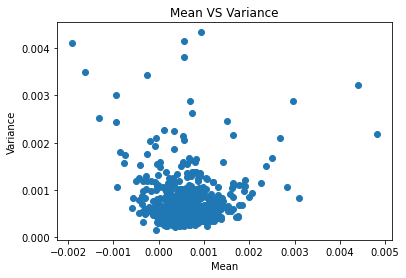

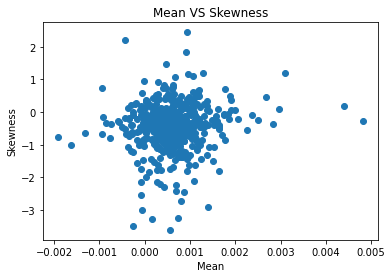

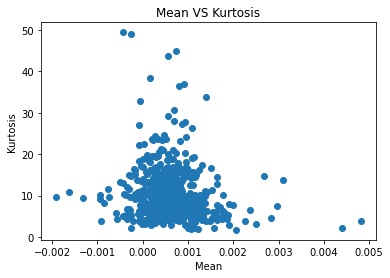

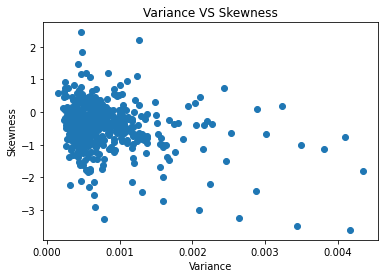

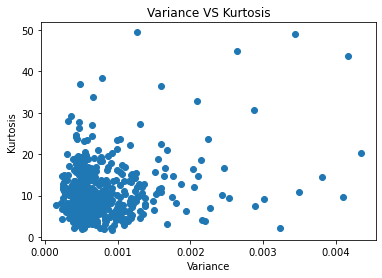

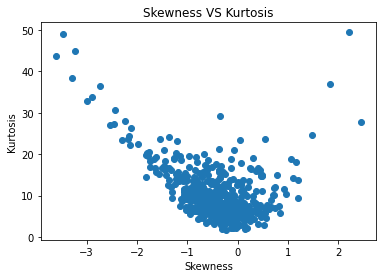

In [78]:
for i in range(1,5):
    for k in range(i+1,5):
        plt.scatter(post_df.iloc[:,i], post_df.iloc[:,k])
        title = str(post_df.iloc[:,i].name) + ' VS ' + str(post_df.iloc[:,k].name)
        plt.title(title)
        plt.ylabel(post_df.iloc[:,k].name)
        plt.xlabel(post_df.iloc[:,i].name)
        plt.show()

#### Checked stability of returns thorugh a Kolmogorov Smirnov test

In [12]:
for i in Moments:
    print(str(ks_2samp(pre_df[i], post_df[i])) + ' for the ' + str(i))

KstestResult(statistic=0.16143062573177536, pvalue=3.217897355911603e-06) for the Mean
KstestResult(statistic=0.6368076128210971, pvalue=1.4432899320127035e-15) for the Variance
KstestResult(statistic=0.1764511743766649, pvalue=2.3796310089085893e-07) for the Skewness
KstestResult(statistic=0.3015543105006326, pvalue=1.4432899320127035e-15) for the Kurtosis
KstestResult(statistic=0.32143502620639797, pvalue=1.4432899320127035e-15) for the Correlation


#### Tested if higher returns are linked to higher ESG score

In [ ]:
start=dt.datetime(2021,1,1)
end=dt.datetime(2021,12,31)

tot_returns=[]

for i in modified_tickers:  
    df=web.DataReader(i,"yahoo",start,end)
    df['log_ret']=np.log(df['Adj Close'])-np.log(df['Adj Close'].shift(1))
    df['log_ret']=df['log_ret'].fillna(0)
    tot_returns.append(df['log_ret'].sum())

In [13]:
final_df=pd.DataFrame(list(zip(modified_tickers, tot_returns)),columns=['Tickers', 'Yearly return'])
final_df.sort_values(by='Yearly return',ascending=False,inplace=True)

snp_return=final_df.loc[final_df['Tickers']=='^GSPC']
top10=final_df.head(10)
bottom10=final_df.tail(10)

new_df=pd.concat([top10, bottom10]) 

In [15]:
esg=[]
for i in new_df['Tickers']:
    try:
        esg_data = pd.DataFrame.transpose(yf.Ticker(i).sustainability)['totalEsg'][0]
        esg.append(esg_data)
    except:
        esg_data='N/A'
        esg.append(esg_data)
        continue

31.67
19.53
31.19
42.72
30.5
12.77
36.63
16.12
18.23
11.92
17.22
14.57
16.15
19.29
18.36


In [16]:
new_df['ESG_score']=esg
new_df=new_df[new_df.ESG_score != 'N/A']

In [44]:
newtop10=new_df.head(8)
newbottom10=new_df.tail(7)

print(newtop10)
print(newbottom10)

    Tickers  Yearly return ESG_score
144     DVN       1.064785     31.67
202    FTNT       0.903848     19.53
201       F       0.896116     31.19
297     MRO       0.891678     42.72
417    SBNY       0.874917      30.5
348    NVDA       0.808301     12.77
347     NUE       0.794238     36.63
61     BBWI       0.786093     16.12
    Tickers  Yearly return ESG_score
194     FIS      -0.236176     18.23
259    IPGP      -0.237150     11.92
149   DISCA      -0.263279     17.22
114    CTXS      -0.290946     14.57
6      ATVI      -0.296215     16.15
220     GPN      -0.421804     19.29
283     LVS      -0.431513     18.36


In [46]:
f_oneway(newtop10['ESG_score'],newbottom10['ESG_score'])

F_onewayResult(statistic=7.443004874475832, pvalue=0.017241363117037268)